In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.spatial.transform import Rotation as R
from scipy.spatial.transform import Slerp

%matplotlib widget


def plot_vector(unit_vectors):
    # Create a figure and a 3D subplot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create spherical coordinates
    u = np.linspace(0, 2 * np.pi, 20)
    v = np.linspace(0, np.pi, 20)
    u, v = np.meshgrid(u, v)

    # Convert spherical coordinates to Cartesian coordinates for unit sphere
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)

    # Plot the unit sphere
    ax.plot_surface(x, y, z, color = 'b', alpha=0.2)
    
    #plot meshgrid
    ax.plot_wireframe(x, y, z, color = 'k', alpha=0.1)

    # Define a list of colors
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    # Plot unit vectors
    for i, unit_vector in enumerate(unit_vectors):
        # Normalize the vector to make it a unit vector
        unit_vector = unit_vector / np.linalg.norm(unit_vector)
        
        # Plot the unit vector as a quiver with a different color
        color = colors[i % len(colors)]  # Cycle through colors
        ax.quiver(0, 0, 0, unit_vector[0], unit_vector[1], unit_vector[2],color=color)

    # Plot the origin
    ax.plot([0], [0], [0], marker='+', color='r', label='Origin')

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Set plot title
    ax.set_title('Unit Sphere')
    ax.axis('equal')

    # Enable interactive rotation, panning, and zooming
    ax.view_init(elev=20, azim=30)
    ax.mouse_init()

    # Show the plot
    plt.show()

    return ax

def euler2rotm(euler_angs):
    roll = np.deg2rad(euler_angs[0])
    pitch = np.deg2rad(euler_angs[1])
    yaw = np.deg2rad(euler_angs[2])
    R_x = np.array([[1, 0, 0],
                    [0, np.cos(roll), -np.sin(roll)],
                    [0, np.sin(roll), np.cos(roll)]
                    ])

    R_y = np.array([[np.cos(pitch), 0, np.sin(pitch)],
                    [0, 1, 0],
                    [-np.sin(pitch), 0, np.cos(pitch)]
                    ])

    R_z = np.array([[np.cos(yaw), -np.sin(yaw), 0],
                    [np.sin(yaw), np.cos(yaw), 0],
                    [0, 0, 1]
                    ])

    R = R_z @ R_y @ R_x

    return R

def plot_sphere_line(ax, start_point, end_point, num_points=100):

    # Parametrically define the line points
    t = np.linspace(0, 1, num_points)
    line_points = (1 - t)[:, np.newaxis] * start_point + t[:, np.newaxis] * end_point

    # Map line points to the sphere's surface
    line_points /= np.linalg.norm(line_points, axis=1, keepdims=True)

    # Plot the line on the sphere
    ax.plot(line_points[:, 0], line_points[:, 1], line_points[:, 2], color='m', label='Line on Sphere')

    for i, unit_vector in enumerate(line_points):
        # Normalize the vector to make it a unit vector
        if i%10==0:
            unit_vector = unit_vector / np.linalg.norm(unit_vector)
            # Define a list of colors
            # colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
            # Plot the unit vector as a quiver with a different color
            # color = colors[i % len(colors)]
            ax.quiver(0, 0, 0, unit_vector[0], unit_vector[1], unit_vector[2],color='m', alpha =0.2)

    # print(line_points)

def interpolate_rpy(start_rpy, end_rpy, num_points):
    # Convert RPY angles to rotation matrices
    start_end = R.from_euler('xyz', [list(start_rpy), list(end_rpy)], degrees=True)
    
    # Create a Slerp object and perform interpolation
    slerp = Slerp([0, 2], start_end)
    inter_time = np.linspace(0, 2, num_points)
    interpolated_rotations = slerp(inter_time)
    
    # Convert interpolated rotations to RPY angles
    interpolated_rpy_angles = interpolated_rotations.as_euler('xyz', degrees=True)
    
    return interpolated_rpy_angles



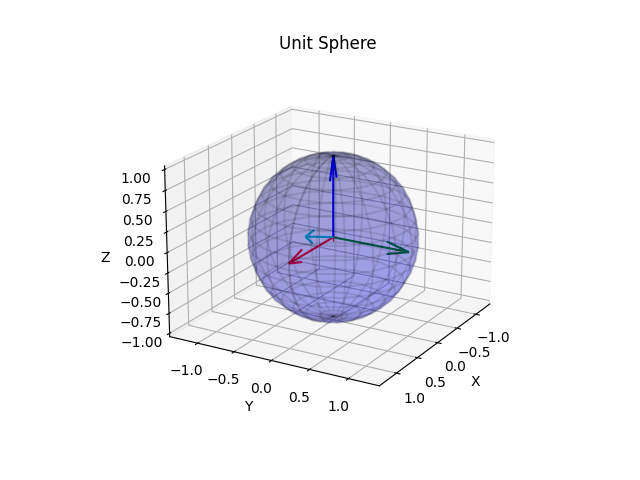

In [74]:
z_ax = np.array([0, 0, 1])
y_ax = np.array([0, 1, 0])
x_ax = np.array([1, 0, 0]) 

rpy = np.array([62, 45, 80])  #destination RPY angles  ###Change values here###

r = euler2rotm(rpy)

u_vec = r@z_ax


# Get the existing subplot using the plot_vector function
ax = plot_vector([x_ax, y_ax, z_ax, u_vec])


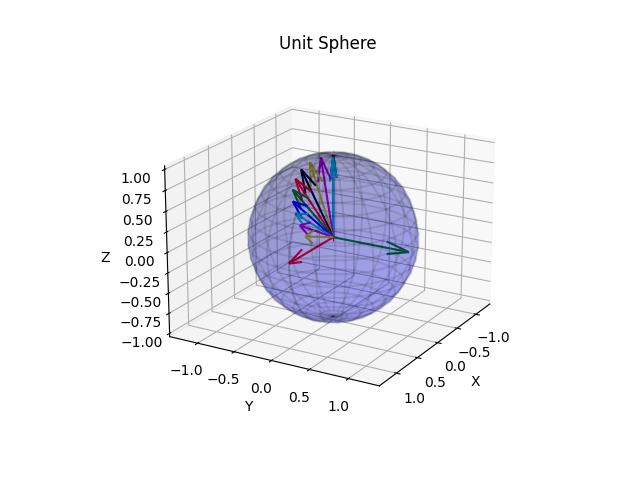

In [75]:
#linear interpolation
import numpy as np
from scipy.spatial.transform import Rotation as R

# Define start and end RPY angles and number of points
start_rpy = np.array([0, 0, 0])  # Start RPY angles in degrees
end_rpy = rpy  # End RPY angles in degrees
num_points = 10  # Number of points for interpolation


# Interpolate Euler angles directly
interpolated_rpy_angles = []
for t in np.linspace(0, 1, num_points):
    intermediate_rpy = (1 - t) * start_rpy + t * end_rpy  
    interpolated_rpy_angles.append(intermediate_rpy)

euls_list = [x_ax, y_ax, z_ax]
for euls in interpolated_rpy_angles:
    euls_list.append(euler2rotm(np.array([euls[0], euls[1], euls[2]]))@z_ax)
    # print(euls)

ax = plot_vector(euls_list)

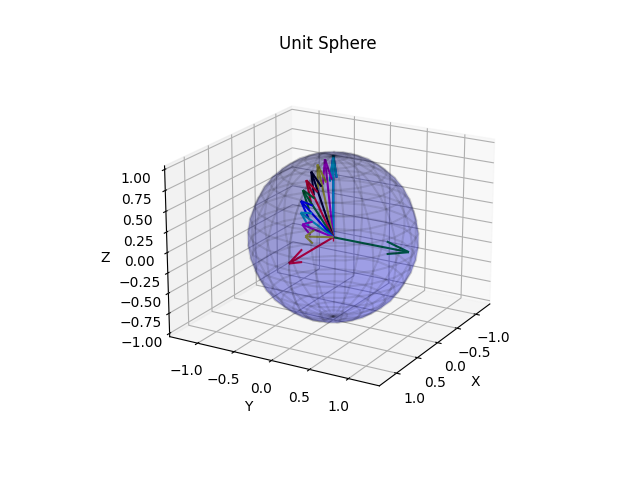

In [76]:
# With Spherical linear interpolation

# Define start and end RPY angles and number of points
start_rpy = np.array([0, 0, 0])  # Start RPY angles in degrees
end_rpy = rpy  # End RPY angles in degrees
num_points = 10  # Number of points for interpolation

interp_rot = interpolate_rpy(start_rpy, end_rpy, num_points)  #slerp function

euls_list = [x_ax, y_ax, z_ax]
for euls in interp_rot:
    # print(euler2rotm(euls[0], euls[1], euls[2]))
    euls_list.append(euler2rotm(euls)@z_ax)

ax = plot_vector(euls_list)




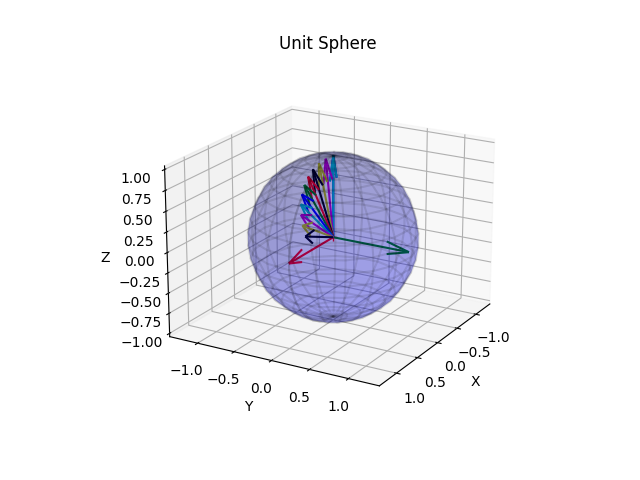

In [77]:
def quaternion_slerp(q0, q1, t):
    # Compute the dot product between the two quaternions
    dot = np.dot(q0, q1)
    
    DOT_THRESHOLD = 0.9995
    if dot > DOT_THRESHOLD:
        # Linearly interpolate and normalize if inputs are too close
        result = q0 + t * (q1 - q0)
        result /= np.linalg.norm(result)
        return result
    
    # Clamp the dot product to stay within the domain of acos()
    dot = np.clip(dot, -1, 1)
    
    # Compute theta_0 and theta
    theta_0 = np.arccos(dot)
    theta = theta_0 * t
    
    # Compute intermediate quaternion v2
    v2 = q1 - q0 * dot
    v2 /= np.linalg.norm(v2)
    
    # Slerp interpolation
    result = q0 * np.cos(theta) + v2 * np.sin(theta)
    
    return result

# Define start and end RPY angles (in degrees)
start_rpy = np.array([0, 0, 0])
end_rpy = rpy

# Convert RPY angles to quaternions
start_quat = R.from_euler('xyz', start_rpy, degrees=True).as_quat()
end_quat = R.from_euler('xyz', end_rpy, degrees=True).as_quat()

euls_list = [x_ax, y_ax, z_ax]
# Perform Slerp interpolation for different values of t
num_points = 10
for i in range(num_points + 1):
    t = i / num_points
    interpolated_quat = quaternion_slerp(start_quat, end_quat, t)
    interpolated_rpy = R.from_quat(interpolated_quat).as_euler('xyz', degrees=True)
    # print(f"t = {t:.2f}, Interpolated RPY angles: {interpolated_rpy}")
    euls_list.append(euler2rotm(interpolated_rpy)@z_ax)


# for vec in euls_list:
#     print(vec)

ax = plot_vector(euls_list)


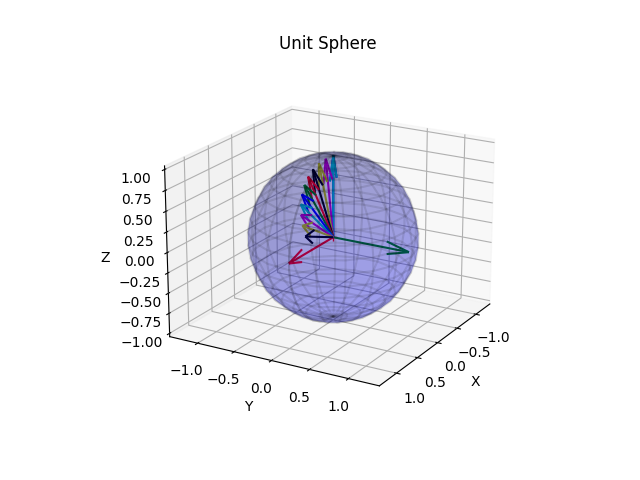

In [78]:
# class Quaternion:
#     def __init__(self, w, x, y, z):
#         self.x = x
#         self.y = y
#         self.z = z
#         self.w = w

def to_quaternion(rpy):
    rpy = np.deg2rad(rpy)
    cr = np.cos(rpy[0] * 0.5)
    sr = np.sin(rpy[0] * 0.5)
    cp = np.cos(rpy[1] * 0.5)
    sp = np.sin(rpy[1] * 0.5)
    cy = np.cos(rpy[2] * 0.5)
    sy = np.sin(rpy[2] * 0.5)

    # q = Quaternion(
    #     cr * cp * cy + sr * sp * sy,
    #     sr * cp * cy - cr * sp * sy,
    #     cr * sp * cy + sr * cp * sy,
    #     cr * cp * sy - sr * sp * cy
    # )
    q = np.array([
        sr * cp * cy - cr * sp * sy,
        cr * sp * cy + sr * cp * sy,
        cr * cp * sy - sr * sp * cy,
        cr * cp * cy + sr * sp * sy
    ])

    return q

def to_euler_angles(q):
    angles = np.zeros(3)

    # roll (x-axis rotation)
    sinr_cosp = 2 * (q[3] * q[0] + q[1] * q[2])
    cosr_cosp = 1 - 2 * (q[0] * q[0] + q[1] * q[1])
    angles[0] = np.arctan2(sinr_cosp, cosr_cosp)

    # pitch (y-axis rotation)
    sinp = np.sqrt(1 + 2 * (q[3] * q[1] - q[0] * q[2]))
    cosp = np.sqrt(1 - 2 * (q[3] * q[1] - q[0] * q[2]))
    angles[1] = 2 * np.arctan2(sinp, cosp) - np.pi / 2

    # yaw (z-axis rotation)
    siny_cosp = 2 * (q[3] * q[2] + q[0] * q[1])
    cosy_cosp = 1 - 2 * (q[1] * q[1] + q[2] * q[2])
    angles[2] = np.arctan2(siny_cosp, cosy_cosp)

    angles = np.rad2deg(angles)

    return angles

def quaternion_slerp(q0, q1, t):
    # Compute the dot product between the two quaternions
    dot = np.dot(q0, q1)
    
    DOT_THRESHOLD = 0.9995
    if dot > DOT_THRESHOLD:
        # Linearly interpolate and normalize if inputs are too close
        result = q0 + t * (q1 - q0)
        result /= np.linalg.norm(result)
        return result
    
    # Clamp the dot product to stay within the domain of acos()
    dot = np.clip(dot, -1, 1)
    
    # Compute theta_0 and theta
    theta_0 = np.arccos(dot)
    theta = theta_0 * t
    
    # Compute intermediate quaternion v2
    v2 = q1 - q0 * dot
    v2 /= np.linalg.norm(v2)
    
    # Slerp interpolation
    result = q0 * np.cos(theta) + v2 * np.sin(theta)
    
    return result


# Define start and end RPY angles (in degrees)
start_rpy = np.array([0, 0, 0])
end_rpy = rpy


start_quat_c = to_quaternion(start_rpy)
end_quat_c = to_quaternion(end_rpy)


euls_list = [x_ax, y_ax, z_ax]
# Perform Slerp interpolation for different values of t
num_points = 10
for i in range(num_points + 1):
    t = i / num_points
    interpolated_quat = quaternion_slerp(start_quat, end_quat, t)
    interpolated_rpy = to_euler_angles(interpolated_quat)
    # print(f"t = {t:.2f}, Interpolated RPY angles: {interpolated_rpy}")
    euls_list.append(euler2rotm(interpolated_rpy)@z_ax)


# for vec in euls_list:
#     print(vec)

ax = plot_vector(euls_list)